### Data

In [1]:
plt.style.use('bmh')
color = '#1240AB'

In [2]:
df = pd.read_pickle('../data/df_sales.pkl')

df['tr_split'] = df['tr_year'].map(lambda x: '1. Before 2018' if x < '2018' else '2. After 2018')

delta = 0.05
filt = ~df['Property Size (sq.m) RANK'].between(delta,1-delta)
df.loc[filt, 'Property Size (sq.m)'] = np.nan

df['buyer_is_1'] = df['No. of Buyer'].map({1:1}).fillna(0).astype(int)
df['seller_is_1'] = df['No. of Seller'].map({1:1}).fillna(0).astype(int)

print(df.shape)
df[:3]

(441392, 57)


,Transaction Number,Transaction Date,Property ID,Transaction Type,Transaction sub type,Registration type,Usage,Area,Property Type,Property Sub Type,Amount,Transaction Size (sq.m),Property Size (sq.m),Room(s),Parking,Nearest Metro,Nearest Mall,Nearest Landmark,No. of Buyer,No. of Seller,Project,Room(s) CLEAN,Property Type CLEAN,Property Sub Type CLEAN,Usage CLEAN,Nearest Landmark CLEAN,Nearest Mall CLEAN,Nearest Metro CLEAN,Project CLEAN,tr_day,tr_month,tr_quarter,tr_year,k,Price per sq.m,Amount LOG,Property Size (sq.m) LOG,Price per sq.m LOG,Amount RANK,Property Size (sq.m) RANK,Price per sq.m RANK,reg_ready,free_hold,region,sector,region LABEL,Project CLEAN LABEL,Nearest Metro CLEAN LABEL,Nearest Mall CLEAN LABEL,Nearest Landmark CLEAN LABEL,Property Type CLEAN LABEL,Property Sub Type CLEAN LABEL,Usage CLEAN LABEL,Room(s) CLEAN LABEL,tr_split,buyer_is_1,seller_is_1
0,11-12317-2022,2022-06-02 15:22:00,79102731,Sales,Sale,Ready,Commercial,AL FURJAN,Land,Commercial,"1,500,000.00",600.51,600.51,NaN,0,NaN,NaN,NaN,1.00,1.00,NaN,,Land,Commercial,Commercial,,,,,2022-06-02,2022-06-01,2022Q2,2022,1.00,"2,497.88",14.22,6.40,7.82,0.11,0.70,0.04,1,1,JEBEL ALI 1,5.00,6,0,0,1,3,1,4,1,1,2. After 2018,1,1
1,11-12316-2022,2022-06-02 15:07:00,132952797,Sales,Sale,Ready,Residential,AKOYA OXYGEN,Land,Residential,"815,000.00",112.24,NaN,NaN,0,NaN,NaN,Dubai Cycling Course,1.00,1.00,DAMAC HILLS (2) - AMARGO,,Land,Residential,Residential,Dubai Cycling Course,,,DAMAC HILLS (2) - AMARGO,2022-06-02,2022-06-01,2022Q2,2022,1.00,"7,261.23",13.61,4.72,8.89,0.02,0.02,0.26,1,1,AL HEBIAH 3,6.00,8,241,0,1,8,1,1,0,1,2. After 2018,1,1
2,102-14693-2022,2022-06-02 14:56:00,1134745314,Sales,Sell - Pre registration,Off-Plan,Residential,AL FURJAN,Unit,Flat,"425,993.00",49.47,49.47,Studio,1,Ibn Battuta Metro Station,Ibn-e-Battuta Mall,Expo 2020 Site,0.00,1.00,Prime Residency 3,Studio,Unit,Flat,Residential,Expo 2020 Site,Ibn-e-Battuta Mall,Ibn Battuta Metro Station,Prime Residency 3,2022-06-02,2022-06-01,2022Q2,2022,1.00,"8,611.14",12.96,3.90,9.06,0.09,0.22,0.17,0,1,JEBEL ALI 1,5.00,6,452,12,5,9,0,0,0,3,2. After 2018,0,1


In [3]:
n = df.shape[0]
s = pd.concat([(df.isnull().sum()).reset_index().T, df.nunique().reset_index().T[1:], df.dtypes.reset_index().T[1:]])
s.index = ['feat','nulls','unique','type']
s

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56
feat,Transaction Number,Transaction Date,Property ID,Transaction Type,Transaction sub type,Registration type,Usage,Area,Property Type,Property Sub Type,Amount,Transaction Size (sq.m),Property Size (sq.m),Room(s),Parking,Nearest Metro,Nearest Mall,Nearest Landmark,No. of Buyer,No. of Seller,Project,Room(s) CLEAN,Property Type CLEAN,Property Sub Type CLEAN,Usage CLEAN,Nearest Landmark CLEAN,Nearest Mall CLEAN,Nearest Metro CLEAN,Project CLEAN,tr_day,tr_month,tr_quarter,tr_year,k,Price per sq.m,Amount LOG,Property Size (sq.m) LOG,Price per sq.m LOG,Amount RANK,Property Size (sq.m) RANK,Price per sq.m RANK,reg_ready,free_hold,region,sector,region LABEL,Project CLEAN LABEL,Nearest Metro CLEAN LABEL,Nearest Mall CLEAN LABEL,Nearest Landmark CLEAN LABEL,Property Type CLEAN LABEL,Property Sub Type CLEAN LABEL,Usage CLEAN LABEL,Room(s) CLEAN LABEL,tr_split,buyer_is_1,seller_is_1
nulls,0,0,0,0,0,0,0,0,0,6955,0,0,44128,82178,0,111206,112212,48088,124,124,121359,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35989,35989,0,0,0,0,0,0,0,0,0,0,0,0
unique,440828,324916,342477,1,18,2,2,298,3,43,117727,54581,47417,16,2,57,6,15,17,45,1369,13,3,22,2,16,7,51,963,2873,126,42,11,1,329678,117727,54236,327264,186508,159863,365290,2,2,174,9,175,963,51,7,16,3,22,2,13,2,2,2
type,object,datetime64[ns],int64,object,object,object,object,object,object,object,float64,float64,float64,object,int32,object,object,object,float64,float64,object,object,object,object,object,object,object,object,object,datetime64[ns],datetime64[ns],object,object,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,object,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,object,int32,int32


In [4]:
feats1 = [
 'Property Size (sq.m)',
 'Amount',
 'Price per sq.m',
]
feats2 = [
 'Property Size (sq.m) LOG',
 'Amount LOG',
 'Price per sq.m LOG',
]
feats = feats1 + feats2

feats_rnk = [
 'Property Size (sq.m) RANK',
 'Amount RANK',
 'Price per sq.m RANK',
]

feats_cat = [
 'Property Type CLEAN',
 'Property Sub Type CLEAN',
 'Usage CLEAN',
 'Nearest Metro CLEAN',
 'Nearest Mall CLEAN',
 'Nearest Landmark CLEAN',
 'Room(s) CLEAN',
]
feats_geo = [
 'region',
 'sector',
]
feats_flags = [
 'Parking',
 'buyer_is_1',
 'seller_is_1',
 'reg_ready',
 'free_hold'
]

feat_dt = 'tr_year'
delta = 0.05
interval = (0+delta,1-delta)

### 0. Numeric distributions

124
124


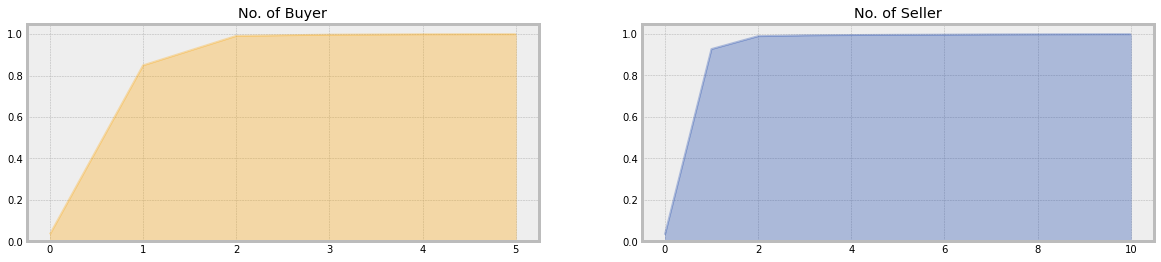

In [5]:
# numeric features distributions
_, ax = plt.subplots(1,2, figsize = (18,4))

feat = 'No. of Buyer'
print(df[feat].isnull().sum())
x = df[feat].value_counts(normalize = True).sort_index().cumsum()
_ = x[:5].plot(ax = ax[0], kind = 'area', alpha = 0.3, color = 'orange', title = feat)

feat = 'No. of Seller'
print(df[feat].isnull().sum())
x = df[feat].value_counts(normalize = True).sort_index().cumsum()
_ = x[:10].plot(ax = ax[1], kind = 'area', alpha = 0.3, color = color, title = feat)

44128
0
0


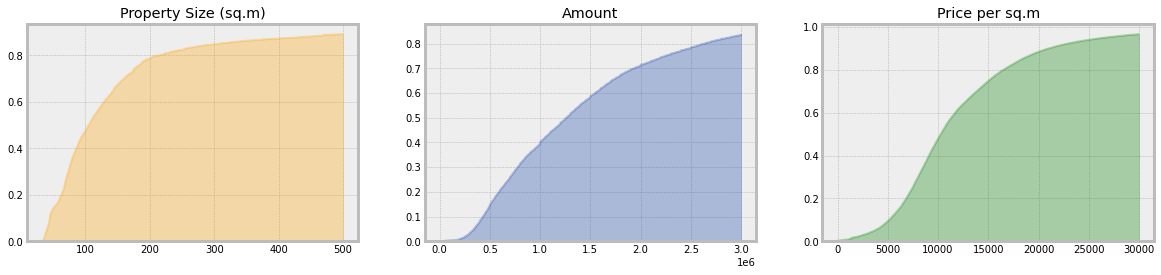

In [6]:
# numeric features distributions
_, ax = plt.subplots(1,3, figsize = (18,4))

feat = feats1[0]
print(df[feat].isnull().sum())
x = df[feat].value_counts(normalize = True).sort_index().cumsum()
_ = x[:500].plot(ax = ax[0], kind = 'area', alpha = 0.3, color = 'orange', title = feat)

feat = feats1[1]
print(df[feat].isnull().sum())
x = df[feat].value_counts(normalize = True).sort_index().cumsum()
_ = x[:3000000].plot(ax = ax[1], kind = 'area', alpha = 0.3, color = color, title = feat)

feat = feats1[2]
print(df[feat].isnull().sum())
x = df[feat].value_counts(normalize = True).sort_index().cumsum()
_ = x[:30000].plot(ax = ax[2], kind = 'area', alpha = 0.3, color = 'green', title = feat)

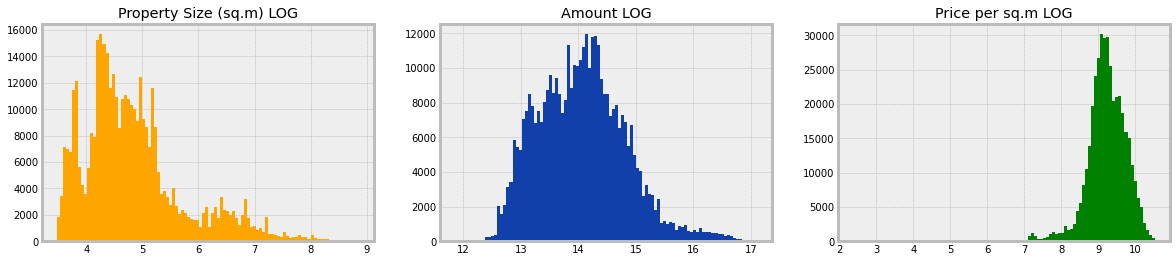

In [7]:
# numeric features distributions
_, ax = plt.subplots(1,3, figsize = (18,4))

feat = feats2[0]
f0 = df[feat]>0
f1 = df[feat[:-4]+' RANK'].between(*interval)
_ = df[f0&f1][feat].hist(ax = ax[0], bins = 100, color = 'orange')
_ = _.set_title(feat)

feat = feats2[1]
f0 = df[feat]>0
f1 = df[feat[:-4]+' RANK'].between(*interval)
_ = df[f0&f1][feat].hist(ax = ax[1], bins = 100, color = color)
_ = _.set_title(feat)

feat = feats2[2]
f0 = df[feat]>0
f1 = df[feat[:-4]+' RANK'].between(*interval)
_ = df[f0&f1][feat].hist(ax = ax[2], bins = 100, color = 'green')
_ = _.set_title(feat)

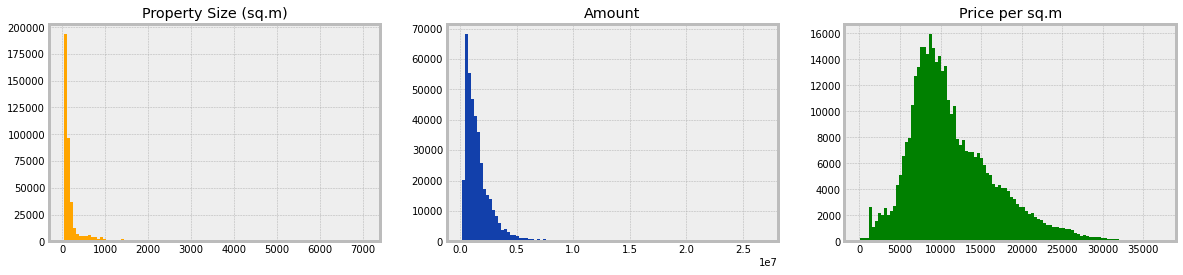

In [8]:
# numeric features distributions
_, ax = plt.subplots(1,3, figsize = (18,4))

feat = feats1[0]
f0 = df[feat]>0
f1 = df[feat+' RANK'].between(*interval)
_ = df[f0&f1][feat].hist(ax = ax[0], bins = 100, color = 'orange')
_ = _.set_title(feat)

feat = feats1[1]
f0 = df[feat]>0
f1 = df[feat+' RANK'].between(*interval)
_ = df[f0&f1][feat].hist(ax = ax[1], bins = 100, color = color)
_ = _.set_title(feat)

feat = feats1[2]
f0 = df[feat]>0
f1 = df[feat+' RANK'].between(*interval)
_ = df[f0&f1][feat].hist(ax = ax[2], bins = 100, color = 'green')
_ = _.set_title(feat)

In [9]:
df[feats].describe(percentiles = [0.01,0.03,0.05,0.1, 0.9,0.95,0.97,0.99])

,Property Size (sq.m),Amount,Price per sq.m,Property Size (sq.m) LOG,Amount LOG,Price per sq.m LOG
count,"397,264.00","441,392.00","441,392.00","441,392.00","441,392.00","441,392.00"
mean,226.92,"2,393,336.04","12,233.98",4.87,14.08,9.21
std,411.81,"8,805,605.21","8,587.61",1.03,0.94,0.74
min,32.44,251.00,0.00,0.84,5.53,-9.68
1%,35.57,"206,770.00","1,184.03",3.38,12.24,7.08
3%,38.05,"295,611.92","2,558.13",3.54,12.60,7.85
5%,40.46,"343,160.00","3,680.71",3.63,12.75,8.21
10%,45.00,"430,853.49","5,122.63",3.76,12.97,8.54
50%,105.33,"1,260,655.25","10,259.23",4.68,14.05,9.24
90%,547.44,"4,002,440.40","20,988.93",6.34,15.20,9.95


### 1. Key property metrics by the year and property type
- number of records
- average/median values
- boxplots

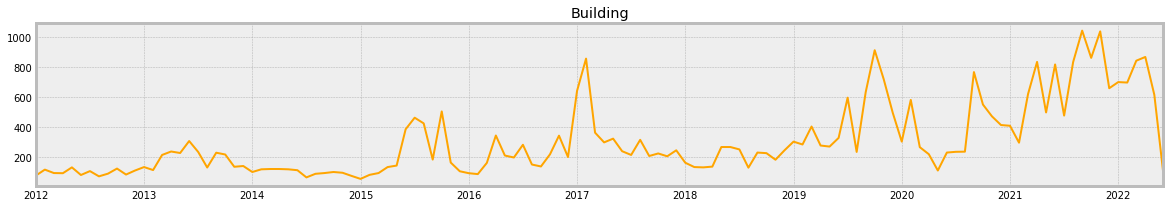

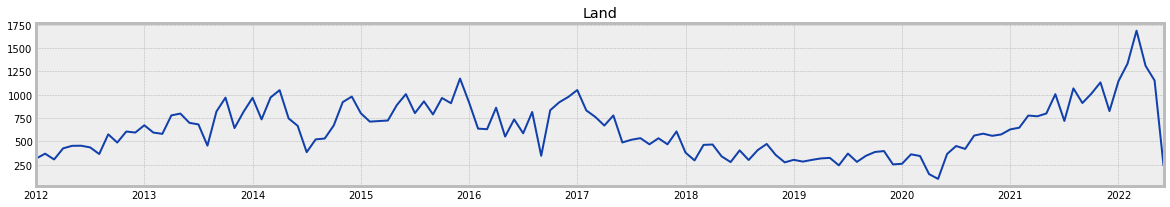

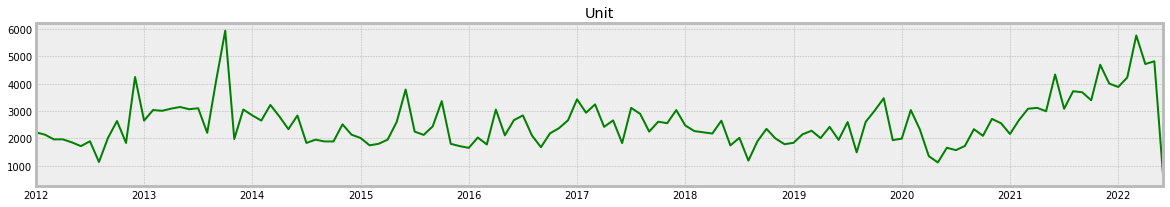

In [10]:
df1 = df.groupby(['tr_month','Property Type CLEAN']).size().unstack()

# _, ax = plt.subplots(4,1, figsize = (15,12))
colors = ['orange',color,'green','blue']
for i,f in enumerate(df1.columns):
    _ = df1[f].plot(figsize = (18,3), kind = 'line', xlabel = '', color = colors[i], title = f)
    plt.show()

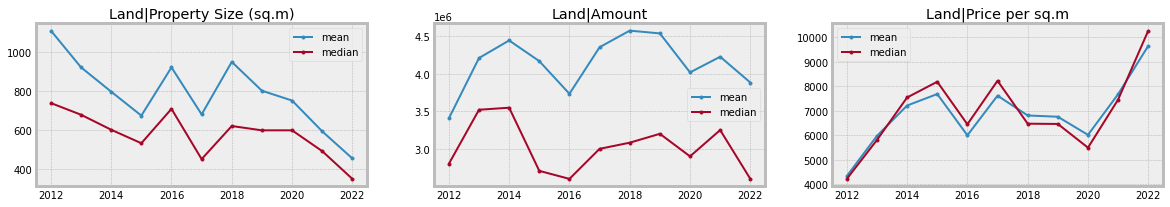

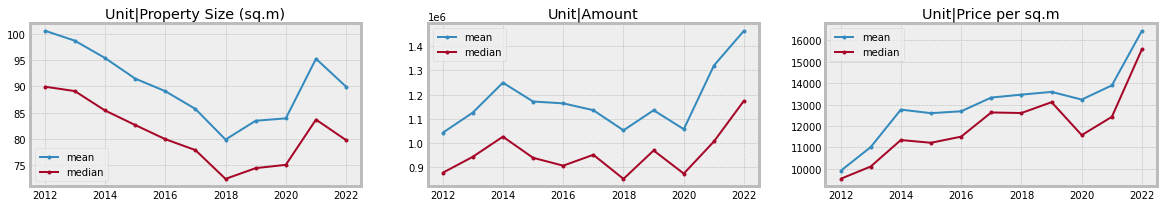

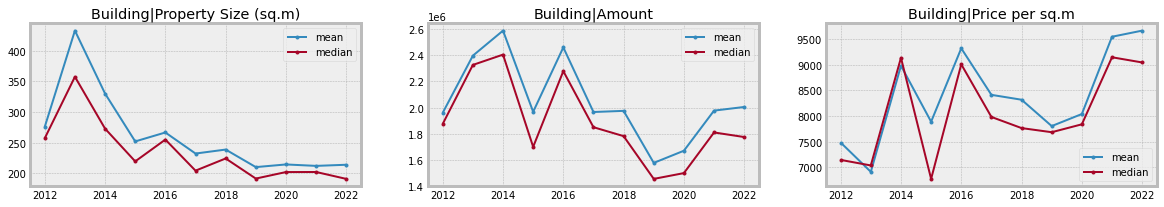

In [11]:
feat1 = feat_dt
for t in df['Property Type CLEAN'].unique():
    # print(t)
    f0 = df['Property Type CLEAN'] == t
    _, ax = plt.subplots(1,3, figsize = (18,3))
    for i,feat in enumerate(feats1):
        f1 = df[feat.replace('LOG','').strip()+' RANK'].between(*interval)
        x = df[f0&f1].groupby(feat1)[feat].agg([np.mean,np.median])
        _ = x.plot(ax = ax[i], kind = 'line', style = '.-', title = f'{t}|{feat}', xlabel = '')
    plt.show()

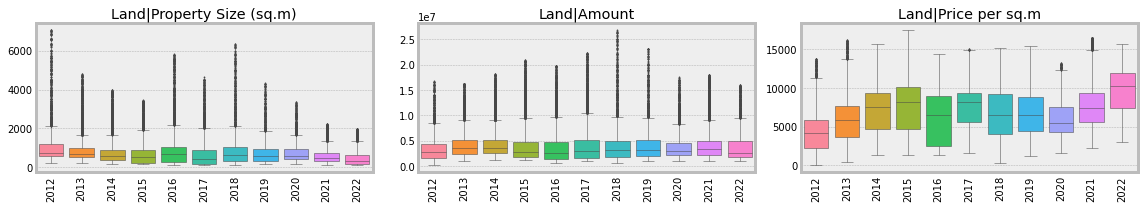

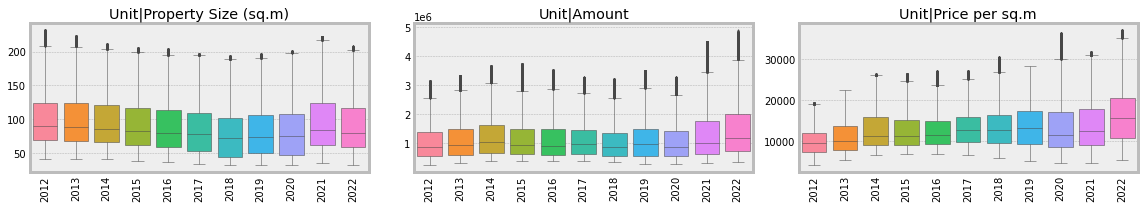

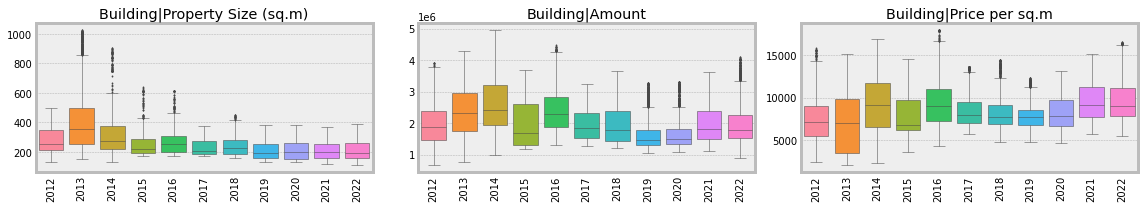

In [12]:
list_type = sorted(df[feat1].unique())

feat1 = feat_dt
for t in df['Property Type CLEAN'].unique():
    # print(t)
    f0 = df['Property Type CLEAN'] == t
    _, ax = plt.subplots(1,3, figsize = (16,3))
    for i,feat2 in enumerate(feats1):
        f1 = df[feat2.replace('LOG','').strip()+' RANK'].between(*interval)
        p = sns.boxplot(x=df[f0&f1][feat1], y=df[f0&f1][feat2], order=list_type, ax = ax[i], linewidth=0.5, saturation=1, fliersize = 1)
        p.set_title(f'{t}|{feat2}')
        # p.set_xlim(0,125000)
        p.set_xlabel('')
        p.set_ylabel('')
        _ = p.set_xticklabels(p.get_xticklabels(),rotation=90)
        plt.tight_layout()

### 2. Correlations of amount, price per sq.m with property size
- general
- yearly
- by types

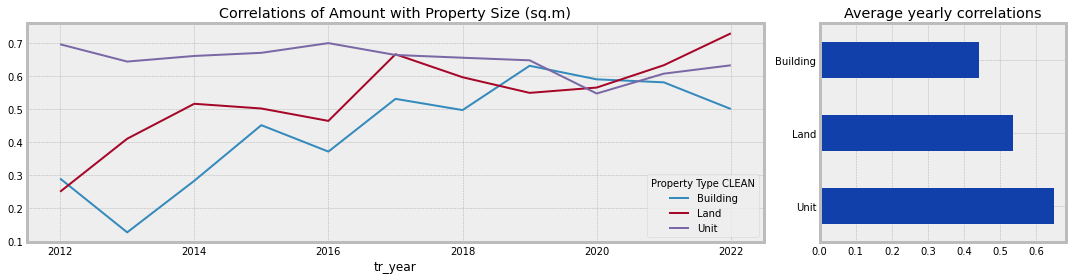

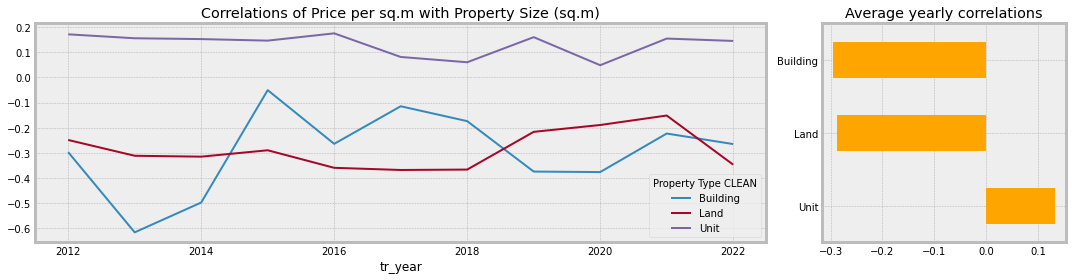

In [13]:
f1 = df[feats_rnk[0]].between(*interval)
f2 = df[feats_rnk[1]].between(*interval)
f3 = df[feats_rnk[2]].between(*interval)

feat1 = 'Property Size (sq.m)'
feats_gr = [feat_dt, 'Property Type CLEAN']

feat2 = feats1[1]
_, ax = plt.subplots(1,2, figsize = (15,4), gridspec_kw={'width_ratios': [3, 1]})
df_corr = df[f1&f2].groupby(feats_gr)[feats1].corr().unstack()[feat1][feat2].unstack()
df_corr.plot(ax = ax[0], title = f'Correlations of {feat2} with {feat1}')
_ = df_corr.mean().sort_values(ascending = False).plot(ax = ax[1], kind = 'barh', color = color, ylabel = '', title = 'Average yearly correlations')
plt.tight_layout()

feat2 = feats1[2]
_, ax = plt.subplots(1,2, figsize = (15,4), gridspec_kw={'width_ratios': [3, 1]})
df_corr = df[f1&f3].groupby(feats_gr)[feats1].corr().unstack()[feat1][feat2].unstack()
df_corr.plot(ax = ax[0], title = f'Correlations of {feat2} with {feat1}')
_ = df_corr.mean().sort_values(ascending = False).plot(ax = ax[1], kind = 'barh', color = 'orange', ylabel = '', title = 'Average yearly correlations')
plt.tight_layout()


### 3. Statistical tables
- number of records
- average/median values

In [14]:
df_all = pd.DataFrame()
for feat1 in feats_cat + feats_geo + feats_flags:
    df1 = df.groupby([feat1,'tr_split'])[feats1].agg(np.median).unstack()

    df2 = df.groupby([feat1,'tr_split']).size().unstack()
    df2 = df2/df2.sum()
    df2.sort_values('2. After 2018', ascending = False, inplace = True)
    df2['3. Growth'] = (df2['2. After 2018'] - df2['1. Before 2018']) / df2['1. Before 2018']
    cols = list(df2.columns)
    df2.columns = [f'{c} Number of records' for c in cols]
    df3 = pd.concat([df2])
    
    for feat in feats1:
        df2 = df1[feat]
        df2['3. Growth'] = (df2['2. After 2018'] - df2['1. Before 2018']) / df2['1. Before 2018']
        cols = list(df2.columns)
        df2.columns = [f'{c} {feat}' for c in cols]
        df3 = pd.concat([df3,df2], axis = 1)
    
    df3['feat'] = feat1
    df_all = pd.concat([df_all, df3])

df_all.reset_index(inplace = True)
df_all.to_csv('../data/stat1_sales.csv', index = False)

print(df_all.shape)
df_all[:3]

(307, 14)


,index,1. Before 2018 Number of records,2. After 2018 Number of records,3. Growth Number of records,1. Before 2018 Property Size (sq.m),2. After 2018 Property Size (sq.m),3. Growth Property Size (sq.m),1. Before 2018 Amount,2. After 2018 Amount,3. Growth Amount,1. Before 2018 Price per sq.m,2. After 2018 Price per sq.m,3. Growth Price per sq.m,feat
0,Unit,0.74,0.72,-0.02,84.32,76.92,-0.09,"942,385.00","980,563.00",0.04,"10,917.03","12,916.72",0.18,Property Type CLEAN
1,Land,0.20,0.15,-0.25,622.25,511.98,-0.18,"3,093,600.00","3,050,000.00",-0.01,"6,654.93","7,306.92",0.10,Property Type CLEAN
2,Building,0.06,0.12,1.18,254.94,201.80,-0.21,"2,082,024.00","1,680,000.00",-0.19,"7,816.23","8,324.48",0.07,Property Type CLEAN
